In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df['numberOfYearold'] = 2020 -  df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,numberOfYearold
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
Car_Name           301 non-null object
Year               301 non-null int64
Selling_Price      301 non-null float64
Present_Price      301 non-null float64
Kms_Driven         301 non-null int64
Fuel_Type          301 non-null object
Seller_Type        301 non-null object
Transmission       301 non-null object
Owner              301 non-null int64
numberOfYearold    301 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 23.6+ KB


In [7]:
final_df = df.copy()
final_df.drop(['Car_Name','Year'],axis=1,inplace=True)

In [8]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,numberOfYearold
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [9]:
final_df['Fuel_Type'].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
final_df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [11]:
final_df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
final_df = pd.get_dummies(final_df,drop_first=True)

In [13]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,numberOfYearold,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [14]:
cor = final_df.corr()

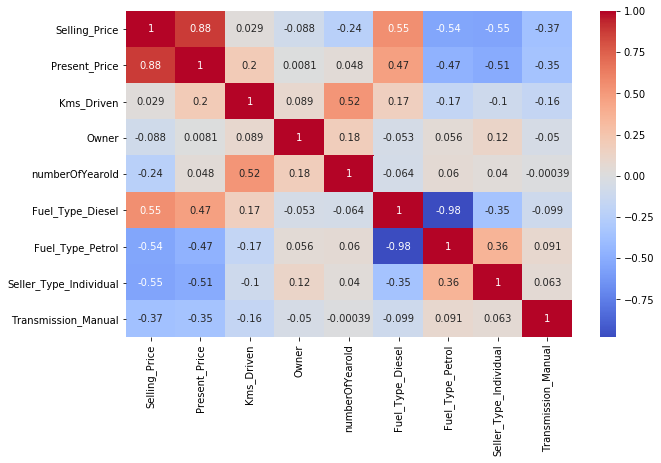

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [16]:
X= final_df.drop(['Selling_Price'],axis=1)
y= final_df['Selling_Price'] 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [20]:
# we will used Randomized search cv
# number of tree in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200,num=12)]
# number of features to consider in every split
max_features = ['auto','sqrt']
# maximum level of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
# minimum samples are required to split a node
min_samples_split = [2,5,10,15,100]
# minimum samples required at each leaf node
min_samples_leaf = [1,2,5,10]



In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
# create the random grid
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]}


In [23]:
# use random_grid for the best hyperparameters
# first create the base model to tune
rf = RandomForestRegressor()

In [24]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [25]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   2.9s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 
[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 
[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   2.6s
[CV] n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5 
[CV]  n_estimators=900, min_samples_split=5, max_depth=10, max_features=sqrt, min_samples_leaf=5, total=   2.5s
[CV] n_estimators=1100, min_samples_split=10, max_depth=15, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=1100, min_samples_split=10, max_depth=15, max_features=sqrt, min_samples_leaf=2, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, ma

[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2, total=   3.3s
[CV] n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2 
[CV]  n_estimators=700, min_samples_split=10, max_depth=5, max_features=sqrt, min_samples_leaf=2, total=   3.5s
[CV] n_estimators=700, min_samples_split=15, max_dep

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [26]:
prediction = rf_random.predict(X_test)

In [27]:
prediction

array([20.88939 ,  0.63949 ,  0.60872 ,  4.42045 ,  0.88611 ,  0.49956 ,
        0.79526 , 11.24281 , 20.34339 ,  0.2252  ,  2.46216 ,  6.71343 ,
        2.37836 ,  3.33818 ,  5.5748  ,  3.23783 ,  1.44734 ,  0.62714 ,
        5.57982 ,  4.41315 ,  0.58214 ,  0.46803 ,  0.85085 ,  3.53216 ,
        1.33904 ,  5.25663 ,  2.69724 ,  2.78712 ,  5.01355 ,  9.84516 ,
        0.54647 ,  7.39812 , 21.67023 ,  1.03329 ,  4.4013  ,  0.79594 ,
        2.57411 ,  0.53172 ,  4.811875,  4.80215 ,  2.82422 ,  5.54857 ,
        0.36465 ,  3.70137 ,  6.73251 ,  5.44825 ,  5.07088 ,  0.22906 ,
        6.98258 ,  0.78331 ,  0.51823 ,  6.83664 ,  0.88638 ,  6.514305,
        2.88241 ,  0.33056 ,  6.83664 ,  8.79247 ,  0.56962 ,  0.64043 ,
        9.43203 ])

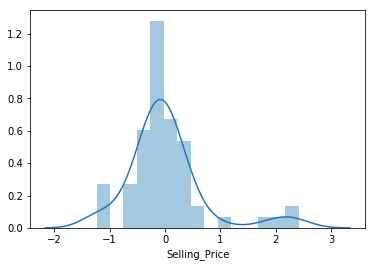

In [28]:
sns.distplot(y_test-prediction)

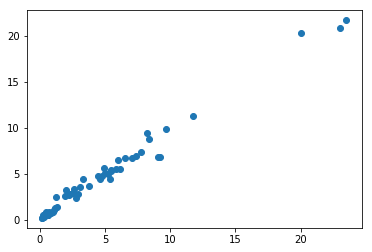

In [29]:
plt.scatter(y_test,prediction)

In [30]:
model.fit(x_train,y_train)

/home/shubham/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
pre = model.predict(X_test)

In [32]:
pre

array([21.265,  0.627,  0.415,  4.46 ,  0.7  ,  0.495,  1.   , 11.888,
       20.8  ,  0.132,  1.545,  7.135,  3.127,  3.57 ,  5.71 ,  2.795,
        2.175,  0.615,  5.19 ,  4.655,  0.354,  0.428,  0.454,  3.545,
        1.251,  5.395,  2.275,  3.155,  4.885,  9.28 ,  0.495,  7.12 ,
       21.65 ,  1.183,  4.61 ,  0.745,  2.685,  0.526,  4.155,  3.835,
        2.86 ,  5.205,  0.275,  3.13 ,  7.46 ,  5.815,  5.065,  0.194,
        6.775,  0.627,  0.446,  7.265,  0.767,  4.66 ,  2.775,  0.263,
        7.265,  9.295,  0.572,  0.52 ,  7.965])

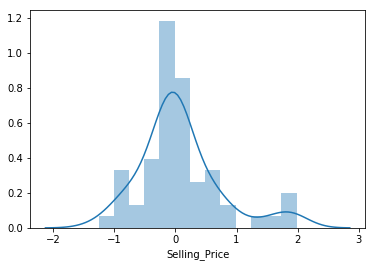

In [33]:
sns.distplot(y_test-pre)

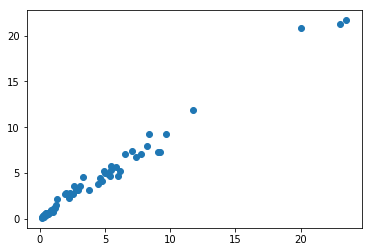

In [34]:
plt.scatter(y_test,pre)

In [35]:
from sklearn.linear_model import  LinearRegression
R = LinearRegression()

In [36]:
R.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
p = R.predict(X_test)

In [38]:
p

array([18.20239194,  0.75134428,  2.91670373,  4.8972651 ,  2.09631193,
       -0.24094671, -1.30251211, 10.02832272, 20.03958118, -3.69975435,
        1.59156971,  6.58336088,  0.26950558,  2.99454836,  8.31938015,
        2.46537411,  1.28184967,  1.11636596,  6.27136343,  4.50874724,
       -0.70951544, -0.64558477,  1.96623473,  2.4801221 ,  2.35387391,
        5.0321569 , -0.28671474,  1.94019888,  4.36960847, 10.15377998,
       -0.14196209,  8.12634216, 20.46520571,  1.37232868,  3.85660407,
        2.11238854,  1.6491905 ,  0.71652565,  6.20119726,  5.25897926,
        2.06111609,  6.79832942,  0.05802918,  3.42396328,  8.90425555,
        6.6739228 ,  5.10884774, -2.28287698,  7.43852219,  1.19447067,
        1.28611185,  6.91376489,  1.7946426 ,  6.32274776,  3.07038255,
        0.06181682,  6.91308928,  7.75928722,  0.94746353, -0.16721323,
        9.14068634])

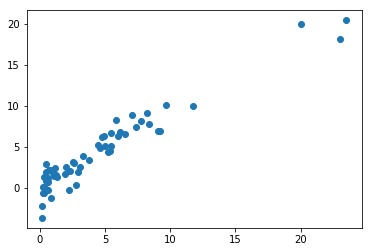

In [39]:
plt.scatter(y_test,p)

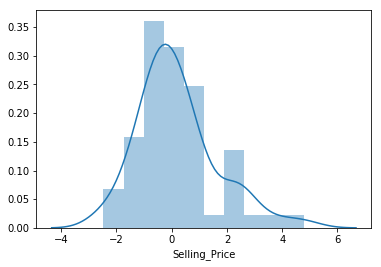

In [40]:
sns.distplot(y_test-p)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error
print('Accuracy of LR',mean_squared_error(prediction,y_test)*100)

('Accuracy of LR', 49.11578507532786)
